# Age and Gender Detection

In [13]:
import cv2
import math
import time
import matplotlib.pyplot as plt

In [14]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv2.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

faceProto = "model/opencv_face_detector.pbtxt"
faceModel = "model/opencv_face_detector_uint8.pb"

ageProto = "model/age_deploy.prototxt"
ageModel = "model/age_net.caffemodel"

genderProto = "model/gender_deploy.prototxt"
genderModel = "model/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv2.dnn.readNet(ageModel, ageProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)
faceNet = cv2.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frameFace, label, (bbox[0], bbox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)
    return frameFace

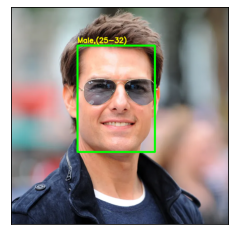

In [15]:
input = cv2.imread("images/1.jpg")
output = age_gender_detector(input)
# cv2.imshow('result',output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other
plt.imshow(output)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

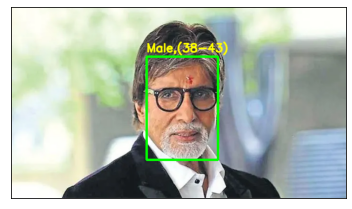

In [21]:
input = cv2.imread("images/2.jpg")
output = age_gender_detector(input)
# cv2.imshow('result',output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other
plt.imshow(output)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

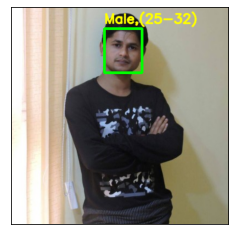

In [16]:
input = cv2.imread("images/3.jpg")
output = age_gender_detector(input)
# cv2.imshow('result',output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other
plt.imshow(output)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()